<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_02/02_assignment_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Group 2 

Team Members :

- Razan Alsallumi
- Waad Alsaleh
- Reem Alamri
- Marwah Alkhalaf




In [2]:
%%capture
# STARTER CODE - RUN THIS CELL - DO NOT CHANGE
!pip install category_encoders
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, accuracy_score, recall_score, precision_score
df_r = sns.load_dataset("tips").dropna()
df_c = sns.load_dataset("titanic").dropna()
model_r = LinearRegression()
model_c = LogisticRegression()
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(df_r.drop("total_bill", axis=1), df_r["total_bill"])
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(df_c.drop(["survived", "alive", "adult_male"], axis=1), df_c["survived"])
pipe_r = make_pipeline(ce.OrdinalEncoder(), StandardScaler(), LinearRegression()).fit(x_train_r, y_train_r)
pipe_c = make_pipeline(ce.OrdinalEncoder(), StandardScaler(), LogisticRegression()).fit(x_train_c, y_train_c)
y_pred_r = pipe_r.predict(x_test_r)
y_pred_c = pipe_c.predict(x_test_c)

In [2]:
pd.options.mode.chained_assignment = None 

# Weekend Project 10

For this weekend project you will will create 2 heuristic models.
- 1 for the Titanic data (Classification)
  - Predict whether a person will survive or not survive.
- 1 for the Tips dataset (Regression)
  - Predict the total bill for each customer
Logistic Regression (Titanic)
You do not have to include all the columns in your feature set. 

## Steps to follow for training and testing your model:

1. Split your dataset to train and test.

    - This is a general split "no need to identify the traget and the feature sets. <br /> <br />
1. Use the training to build and tune "adjust" your heuristic model. 
    - This is the dataset the you with EDA to come up with a algorthim for your model.
       <br /> <br /> **Note: The test set should be completely hidden to you at this point.** <br /> <br />
    - The adjustment happens by chaning the condition inside your function "if statements and otherwise".
    
    - Once you are happy with the performance of you heuristic model, then you can test it. <br /> <br />

1. Test your HM using the test split from your dataset. 
1. Report the baseline model for each HR.
  - Classification (Majority Class)
  - Regression (Mean of target)
1. Compare your model with the Logistic Regression (Titanic) and Linear Regression (Tips)

**Note:** You do not need to beat the accuracy of the models, but you are encouraged to try your best.

**Note:** You do not have to create your own cost functions. Your will use the Scikit-learn cost functions to evaluate your model.

---

#### Resources
- [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)
- [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)
- [Root Mean Squared Error](https://en.wikipedia.org/wiki/Root-mean-square_deviation)
- [Residual Sum of Squares](https://en.wikipedia.org/wiki/Residual_sum_of_squares)
- [Precision, Recall, Accuracy](https://en.wikipedia.org/wiki/Confusion_matrix)
- [Scikit-Learn](https://scikit-learn.org/stable/index.html)

# Heuristic Model for Tips Dataset

#### Regression Cost Functions

- Use `y_test_r` as your true labels
- Use `y_pred_r` as your predicted labels

In [3]:
# Cost Functions for the Linear Regression (Tips) 
print("MSE: ", mean_squared_error(y_test_r, y_pred_r))
print("MAE: ",mean_absolute_error(y_test_r, y_pred_r))
print("RMSE: ",mean_squared_error(y_test_r, y_pred_r, squared=False))

MSE:  33.0419251152142
MAE:  4.456528739396021
RMSE:  5.748210601153563


In [4]:
df_r.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df_r["total_bill"].mean()

19.785942622950824

### 1- Split your dataset to train and test.

In [3]:


train_tips, test_tips = train_test_split(
    df_r, # data
    train_size = 0.8, # size of the train data
    test_size = 0.2, # size of test data
    random_state = 42

)

### 2- Use the training to build and tune "adjust" your heuristic model.

## EDA

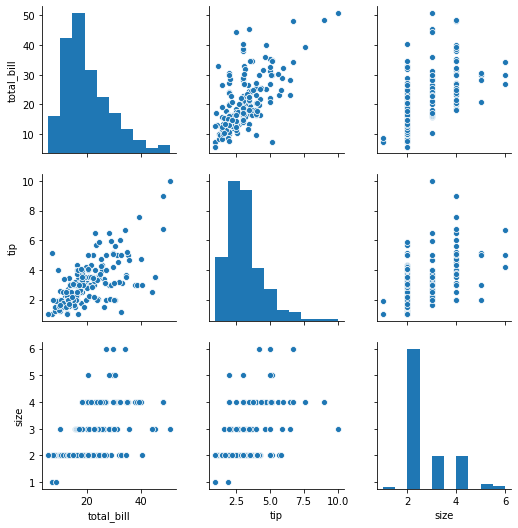

In [7]:
sns.pairplot(train_tips)

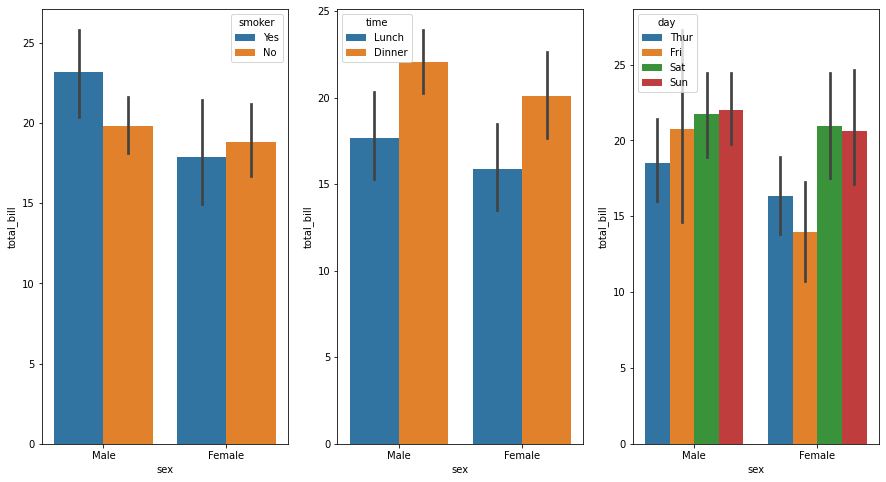

In [8]:
plt.figure(figsize=(15,8))
plt.subplot(1, 3, 1) # 2x2 plot with plot position 1 (upper left)
sns.barplot(x="sex",
            y="total_bill",
            hue="smoker",
            linewidth=2.5,
            #palette="Blues",
            data=train_tips)



#plot 2:

plt.subplot(1, 3, 2) # 2x2 plot with plot position 2 (upper right)
sns.barplot(x="sex",
            y="total_bill",
            hue="time",
            linewidth=2.5,
            #palette="Blues",
            data=train_tips)

plt.subplot(1, 3, 3) # 2x2 plot with plot position 2 (upper right)
sns.barplot(x="sex",
            y="total_bill",
            hue="day",
            linewidth=2.5,
            #palette="Blues",
            data=train_tips)

In [9]:
# Report your baseline model here (Mean of target)


print(f"Regression Mean Baseline: {train_tips['total_bill'].mean()}")


# Predict mean baseline
train_tips["baseline"] = train_tips["total_bill"].mean()



Regression Mean Baseline: 20.217692307692314


In [10]:
train_tips

,total_bill,tip,sex,smoker,day,time,size,baseline
228,13.28,2.72,Male,No,Sat,Dinner,2,20.217692
208,24.27,2.03,Male,Yes,Sat,Dinner,2,20.217692
96,27.28,4.00,Male,Yes,Fri,Dinner,2,20.217692
167,31.71,4.50,Male,No,Sun,Dinner,4,20.217692
84,15.98,2.03,Male,No,Thur,Lunch,2,20.217692
...,...,...,...,...,...,...,...,...
106,20.49,4.06,Male,Yes,Sat,Dinner,2,20.217692
14,14.83,3.02,Female,No,Sun,Dinner,2,20.217692
92,5.75,1.00,Female,Yes,Fri,Dinner,2,20.217692
179,34.63,3.55,Male,Yes,Sun,Dinner,2,20.217692


In [11]:
train_tips["total_bill"].min()

5.75

In [12]:
train_tips.describe()

,total_bill,tip,size,baseline
count,195.000000,195.000000,195.000000,1.950000e+02
mean,20.217692,3.087795,2.574359,2.021769e+01
std,8.770505,1.429049,0.940695,5.698973e-14
min,5.750000,1.000000,1.000000,2.021769e+01
25%,13.660000,2.000000,2.000000,2.021769e+01
50%,17.920000,3.000000,2.000000,2.021769e+01
75%,24.855000,3.695000,3.000000,2.021769e+01
max,50.810000,10.000000,6.000000,2.021769e+01


## Heuristic model

In [41]:
# Build your Heuristic model here


def heuristic(data):

   
    preds = []
    mean_bill=data["total_bill"].mean()

    max_bill=data["total_bill"].max()
    min_bill=data["total_bill"].min()
    rng = np.random.default_rng(42)
 

    
    for x in range(len(data)):
        
        #rng = np.random.default_rng(42)
        f_trur= np.random.uniform(mean_bill, max_bill)
        f_false= np.random.uniform(min_bill, mean_bill)
    
        if  (data.iloc[x]["time"] =="Dinner")&(data.iloc[x]["size"] >=3):
                preds.append(f_trur)
                
#         elif (data.iloc[x]["day"] == "sat") | (data.iloc[x]["day"] == "sun"):
#                  preds.append(f_trur)

        elif (data.iloc[x]["tip"] > 5):
                 preds.append(f_trur)
                
        else:
                preds.append(f_false)
    return preds
    
train_tips["preds"] = heuristic(train_tips)





In [42]:
train_tips

,total_bill,tip,sex,smoker,day,time,size,baseline,preds
228,13.28,2.72,Male,No,Sat,Dinner,2,20.217692,20.031818
208,24.27,2.03,Male,Yes,Sat,Dinner,2,20.217692,13.301053
96,27.28,4.00,Male,Yes,Fri,Dinner,2,20.217692,7.698114
167,31.71,4.50,Male,No,Sun,Dinner,4,20.217692,28.837733
84,15.98,2.03,Male,No,Thur,Lunch,2,20.217692,11.284986
...,...,...,...,...,...,...,...,...,...
106,20.49,4.06,Male,Yes,Sat,Dinner,2,20.217692,17.507508
14,14.83,3.02,Female,No,Sun,Dinner,2,20.217692,11.888578
92,5.75,1.00,Female,Yes,Fri,Dinner,2,20.217692,8.101104
179,34.63,3.55,Male,Yes,Sun,Dinner,2,20.217692,14.351005


In [45]:
# Add your cost functions for your Heuristic Model here

mse=mean_squared_error(train_tips["total_bill"], train_tips["preds"])
print (f" The Mean Squared Error = {mse}")

mae=mean_absolute_error(train_tips["total_bill"], train_tips["preds"])
print (f" The Mean Absolute Error = {mae}")

rms=mean_squared_error(train_tips["total_bill"], train_tips["preds"], squared=False)
print (f" Root Mean Squared Error = {rms}")


#  The Mean Squared Error = 109.53697136232554
#  The Mean Absolute Error = 8.176772167513791
#  Root Mean Squared Error = 10.465991179163373

 The Mean Squared Error = 109.53697136232554
 The Mean Absolute Error = 8.176772167513791
 Root Mean Squared Error = 10.465991179163373


### 3- Test your HM using the test split from your dataset.

In [ ]:
# Test HM 
test_tips["preds"] = heuristic(test_tips)

In [ ]:
test_tips.head()

In [ ]:
test_tips.head(3)

### 4- Report the baseline model for each HM

In [44]:
mse=mean_squared_error(train_tips["total_bill"], train_tips["baseline"])
print (f" The Mean Squared Error = {mse}")

mae=mean_absolute_error(train_tips["total_bill"], train_tips["baseline"])
print (f" The Mean Absolute Error = {mae}")

rms=mean_squared_error(train_tips["total_bill"], train_tips["baseline"], squared=False)
print (f" Root Mean Squared Error = {rms}")

 The Mean Squared Error = 76.52728031558186
 The Mean Absolute Error = 6.874303747534518
 Root Mean Squared Error = 8.747987215101647


------
The Mean square error for our model is 104.04, while the Mean square error is 76.58 for the baseline model. Since lower Mean square error values indicate better model fit, the output suggests that the baseline fits much better than our model. 

### 5- Compare your model with Linear Regression (Tips)

1- The Mean Squared Error 

- The Mean Squared Error In Linear Regression (Tips) =  33.0419251152142
- The Mean Squared Error In Heuristic Model = 109.53697136232554


2- The Mean Absolute Error In Linear Regression (Tips) 


- The Mean Absolute Error In Linear Regression (Tips) = 4.456528739396021
- The Mean Absolute Error In Heuristic Model = 8.176772167513791


3- Root Mean Squared Error

- The Root Mean Squared Error In Linear Regression (Tips) = 5.748210601153563
- The Root Mean Squared Error In Heuristic Model = 10.465991179163373



- For the tips dataset the liner regression prefeormed better than our modle, for the MSE the diffrance is 76.5, for MAE the diffrance is 3.72 and for the RMSE the diffrance is 4.72. 

- The smallest diffrance was with the MAE and the highest diffrance was with the MSE.


# Heuristic Model for Titanic Dataset

#### Classification Cost Functions

- Use `y_test_c` as your true labels
- Use `y_pred_c` as your predicted labels

In [46]:
# LogisticRegressionRecall 
print("Recall Score: ",recall_score(y_test_c, y_pred_c))
print("Precision Score: ",precision_score(y_test_c, y_pred_c))
print("Accuracy Score: ",accuracy_score(y_test_c, y_pred_c))

Recall Score:  0.696969696969697
Precision Score:  0.8214285714285714
Accuracy Score:  0.6739130434782609


In [47]:
df_c.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


### 1- Split your dataset to train and test.

In [4]:

train_titanic, test_titanic = train_test_split(
    df_c, # data
    train_size = 0.8, # size of the train data
    test_size = 0.2, # size of test data
    random_state = 42

)

### 2- Use the training to build and tune "adjust" your heuristic model.

## EDA

In [49]:
train_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,0.682759,1.213793,35.444828,0.475862,0.468966,78.729943
std,0.467015,0.542451,15.101292,0.657043,0.764264,80.386214
min,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,35.000000,0.000000,0.000000,55.900000
75%,1.000000,1.000000,47.000000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


Text(0.5, 1.0, 'Ratio of Survived')

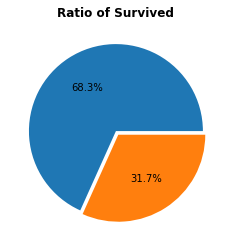

In [50]:

plt.pie(
    x=train_titanic["survived"].value_counts(),
    explode=[0,0.05],
    autopct='%1.1f%%',
    #colors = train_titanic["sex"].value_counts()
    
)

plt.title("Ratio of Survived",weight = "bold")

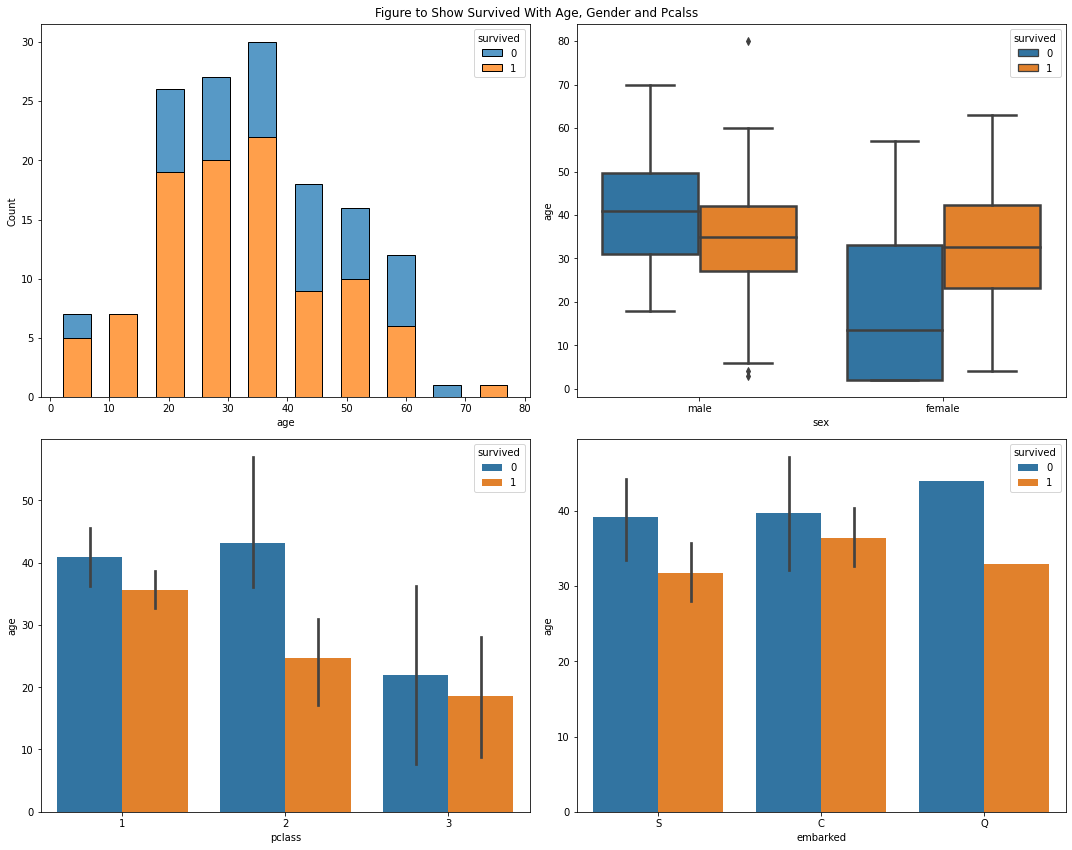

In [5]:
plt.figure(figsize=(15,12))
plt.suptitle('Figure to Show Survived With Age, Gender and Pcalss')



#plot 1:
plt.subplot(2, 2, 1) # 2x2 plot with plot position 1 (upper left)
sns.histplot(data=train_titanic,
             x="age",
             hue="survived",
             multiple="stack",
             #palette="Blues",
             shrink=.6
            )



#plot 2:

plt.subplot(2, 2, 2) # 2x2 plot with plot position 2 (upper right)
sns.boxplot(x="sex",
            y="age",
            hue="survived",
            linewidth=2.5,
            #palette="Blues",
            data=train_titanic)


#plot 3:

plt.subplot(2,2,3)
sns.barplot(x="pclass",
            y="age",
            hue="survived",
            #palette="Blues",
            #alpha = 0.3,
            data=train_titanic
           )


#plot 4:

plt.subplot(2,2,4)
sns.barplot(x="embarked",
             y="age",
            hue="survived",
            
            #palette="Blues",
            data=train_titanic
           )




plt.tight_layout() # To increase space between plots to prevent label overlap
#plt.savefig('Medical_plots.png') # Save figure
plt.show()

In [55]:
# Report your baseline model here (Majority Class)


print(f"Regression Mean Baseline: {train_titanic['survived'].mode()}") # Output = 1


# Predict mean baseline
train_titanic["baseline"] = train_titanic['survived'].mode().values[0]



train_titanic.head()



Regression Mean Baseline: 0    1
dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,baseline
331,0,1,male,45.5,0,0,28.5000,S,First,man,True,C,Southampton,no,True,1
336,0,1,male,29.0,1,0,66.6000,S,First,man,True,C,Southampton,no,False,1
193,1,2,male,3.0,1,1,26.0000,S,Second,child,False,F,Southampton,yes,False,1
75,0,3,male,25.0,0,0,7.6500,S,Third,man,True,F,Southampton,no,True,1
248,1,1,male,37.0,1,1,52.5542,S,First,man,True,D,Southampton,yes,False,1


###  Heuristic model

In [7]:
def heuristic(data):

    preds = []
    
    for x in range(len(data)):


        if (data.iloc[x]["sex"] == "female"):
        
            if( (data.iloc[x]["pclass"] == 3) & (data.iloc[x]["age"] > 5) & (data.iloc[x]["age"] < 35)):
                preds.append(0)
            else:
                preds.append(1)
                
                
        elif  (data.iloc[x]["sex"] == "male"):
            if((data.iloc[x]["age"] < 10) & (data.iloc[x]["pclass"] == 2)) | ((data.iloc[x]["age"] < 40) & (data.iloc[x]["pclass"] == 1)):
                preds.append(1)         
            else:
                preds.append(0)     
                
        else:
                preds.append(0)
    return preds

In [57]:
train_titanic["preds"] = heuristic(train_titanic)

In [58]:
train_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,baseline,preds
331,0,1,male,45.5,0,0,28.5000,S,First,man,True,C,Southampton,no,True,1,0
336,0,1,male,29.0,1,0,66.6000,S,First,man,True,C,Southampton,no,False,1,1
193,1,2,male,3.0,1,1,26.0000,S,Second,child,False,F,Southampton,yes,False,1,1
75,0,3,male,25.0,0,0,7.6500,S,Third,man,True,F,Southampton,no,True,1,0
248,1,1,male,37.0,1,1,52.5542,S,First,man,True,D,Southampton,yes,False,1,1


In [59]:
# Add your cost functions for your Heuristic Model here

print("Recall Score: ",recall_score(train_titanic["survived"], train_titanic["preds"]))
print("Precision Score: ",precision_score(train_titanic["survived"], train_titanic["preds"]))
print("Accuracy Score: ",accuracy_score(train_titanic["survived"], train_titanic["preds"]))

Recall Score:  0.8585858585858586
Precision Score:  0.8095238095238095
Accuracy Score:  0.7655172413793103


### 3- Test your HM using the test split from your dataset.

In [8]:
# make predictions

test_titanic["preds"] = heuristic(test_titanic)

<ipython-input-8-24daeb6e6af6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_titanic["preds"] = heuristic(test_titanic)


In [61]:
test_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,preds
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False,1
251,0,3,female,29.0,1,1,10.4625,S,Third,woman,False,G,Southampton,no,False,0
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False,1
496,1,1,female,54.0,1,0,78.2667,C,First,woman,False,D,Cherbourg,yes,False,1
712,1,1,male,48.0,1,0,52.0000,S,First,man,True,C,Southampton,yes,False,0


In [12]:
print("Accuracy Score: ",accuracy_score(test_titanic["survived"], test_titanic["preds"]))

Accuracy Score:  0.7837837837837838


### 4- Report the baseline model for each HR.



In [62]:
# Add your cost functions for your Heuristic Model here

print("Recall Score: ",recall_score(train_titanic["survived"], train_titanic["baseline"]))
print("Precision Score: ",precision_score(train_titanic["survived"], train_titanic["baseline"]))
print("Accuracy Score: ",accuracy_score(train_titanic["survived"], train_titanic["baseline"]))

Recall Score:  1.0
Precision Score:  0.6827586206896552
Accuracy Score:  0.6827586206896552


-----
The Accuracy for our model is 76.55 %, while the Accuracy score is 68.28 % for the baseline model. Since the higher Accuracy values indicate better model fit, the output suggests that our model fits much better than the baseline model.

### 5- Compare your model with the Logistic Regression (Titanic) 

1- Recall Score

- Recall Score In Logistic Regression = 0.696969696969697
- Recall Score In Heuristic model = 0.8585858585858586


2- Precision Score

- Precision Score In Logistic Regression =  0.8214285714285714
- Precision Score In Heuristic model = 0.8095238095238095



3- Accuracy Score

- Accuracy Score In Logistic Regression = 0.6739130434782609
- Accuracy ScoreIn Heuristic model = 0.7655172413793103


- Over all our model preformed sligtly better than logistic regression with the recall the diffrance is 0.16, with accuracy the diffrance is 0.09 and for precision the diffrance is -0.02.

- Even tho the diffrance is not major our model preformed slightly better.